In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")


In [31]:
df = pd.read_csv('beer_reviews.csv')
df.head(5)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [32]:
df.drop('index', axis='columns', inplace=True)
df.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [33]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

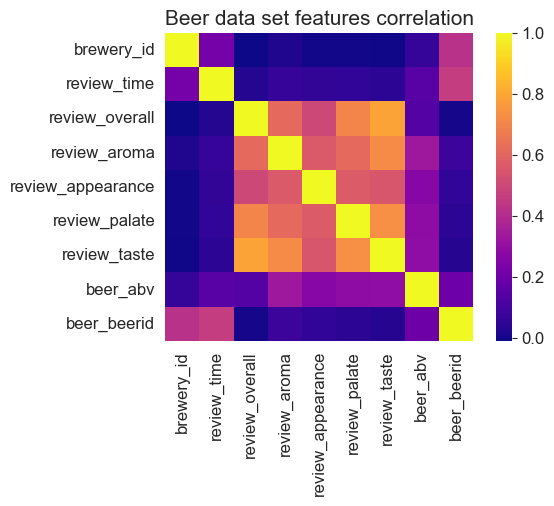

In [53]:
# Creates a correlation matrix based on data passed as an argument. 
from matplotlib import cm as cm

def corr_matrix(df, title):
    fig = plt.figure(figsize=(6, 4))
    ax1 = fig.add_subplot(111)
    cmap = sns.color_palette("plasma", as_cmap=True)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    map = sns.heatmap(df.corr(), cmap=cmap)
    plt.title(title,fontsize=15)
    labels=df.columns
    plt.show()

corr_matrix(df, 'Beer data set features correlation')

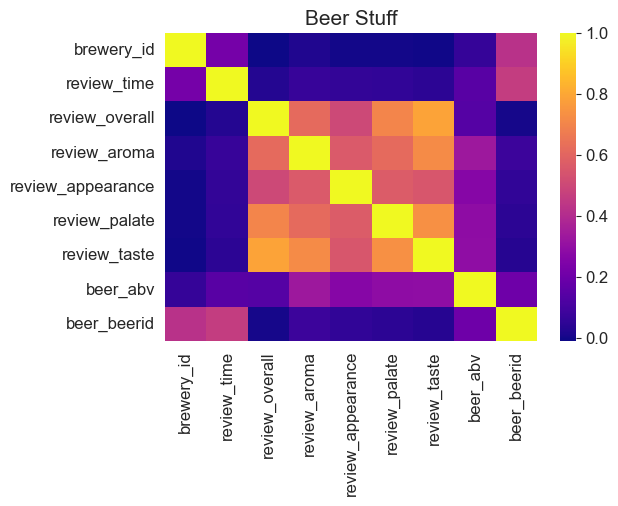

In [52]:

# Creates a correlation matrix based on data passed as an argument. 
def corr_matrix(df, title):
    cmap = sns.color_palette("plasma", as_cmap=True)
    fig = plt.figure(figsize=(6, 4))
    map = sns.heatmap(df.corr(), cmap=cmap)
    plt.title(title,fontsize=15)
    labels=df.columns
    plt.show()

corr_matrix(df, 'Beer Stuff')

In [35]:
beer_df = df.groupby('beer_name').mean().sort_values(by=['beer_beerid'], ascending=True)

In [36]:
beer_df

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_name,,,,,,,,,
Cactus Queen IPA,2.0,1.034934e+09,4.166667,4.000000,3.833333,4.166667,4.166667,NaN,3.0
Wildcatter's Crude Stout,2.0,1.065482e+09,3.700000,3.800000,3.950000,3.700000,3.450000,NaN,4.0
Turbodog,3.0,1.196812e+09,3.706956,3.515964,3.836374,3.513113,3.645382,5.6,6.0
Allagash Dubbel Ale,4.0,1.183002e+09,3.826360,3.746862,3.937936,3.743375,3.767782,7.0,10.0
Bert Grant's Scottish Ale,5.0,1.074705e+09,3.394118,3.388235,3.500000,3.235294,3.270588,4.7,11.0
...,...,...,...,...,...,...,...,...,...
Aass Gourmet Pale Ale,185.0,1.326236e+09,3.000000,3.000000,4.000000,3.000000,3.000000,4.7,77313.0
Betty Brown Norwegian Brwon Ale,18604.0,1.326237e+09,3.500000,3.500000,4.000000,3.000000,4.000000,4.7,77314.0
Icelandic White Beer,27839.0,1.326239e+09,3.500000,4.500000,3.000000,3.000000,3.500000,5.2,77315.0


In [37]:
user_df = df.groupby('review_profilename').mean().sort_values(by=['review_overall'], ascending=False)
user_df

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
review_profilename,,,,,,,,,
zzajjber,721.0,1.258126e+09,5.0,5.0,5.0,5.0,5.0,5.0,2270.0
edelman900,13307.0,1.266369e+09,5.0,5.0,4.5,4.0,4.5,10.9,54282.0
eknee,287.0,1.324055e+09,5.0,5.0,5.0,5.0,5.0,10.0,17112.0
DaveCole227,162.0,1.205364e+09,5.0,4.5,4.0,4.5,4.5,7.0,260.0
ejthetiger,163.0,1.219022e+09,5.0,3.0,4.0,5.0,5.0,3.5,436.0
...,...,...,...,...,...,...,...,...,...
jtstott,35.0,1.311535e+09,1.0,1.0,3.0,1.0,1.0,5.3,103.0
IheartBeer,106.0,1.168404e+09,1.0,1.0,2.0,1.0,1.0,5.9,3160.0
rolfecat,23.0,1.207085e+09,1.0,3.0,3.5,2.0,1.5,6.2,21473.0


In [38]:
reviews_df = pd.DataFrame(df.groupby('beer_name')['review_overall'].mean())
reviews_df['num_reviews'] = pd.DataFrame(df.groupby('beer_name')['review_overall'].count())
reviews_df

,review_overall,num_reviews
beer_name,,
! (Old Ale),4.000000,1
"""100""",4.000000,5
"""100"" Pale Ale",4.000000,1
"""12"" Belgian Golden Strong Ale",4.000000,2
"""33"" Export",3.000000,3
...,...,...
Žamberecký Kanec Imperial Stout,3.750000,2
Ω-naught (Omeganaught),4.166667,3
“Chewy” Double IPA,2.500000,1
